Naive Bayes Classification	
    Bayesian Classification
    Gaussian Naive Bayes
    Multinomial Naive Bayes
	When to Use Naive Bayes

Bayesian Classification
    
    Bayes Theorm -> Used to find the Prob of hypothesis with prior knowledge(Conditional Prob)
    P(A/B)=P(B/A)P(A)/ P(B)
    
    Naive -> Lack of experiece & belive what it sees or hear
    Bayes -> It is using  Bayes Theorm
    Classification -> Classify one or 2 or more 
    
    
    Gender Classification:
    
     P(L/Features)=P(Features/L)P(L)/ P(Features)
    
      L1 & L2 = P(L1/Features)/=P(Features/L1)P(L1)/             
               P(L2/Features)=P(Features/L2)P(L2)
   
    

Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

1.Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
2.Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.
3.Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

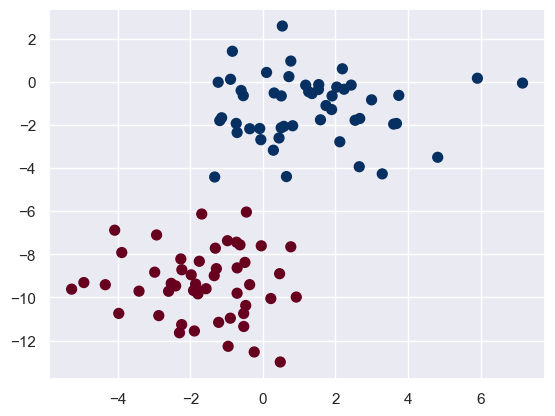

In [1]:
#  Gaussian Naive Bayes

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');


[(-8.0, 8.0), (-15.0, 5.0)]

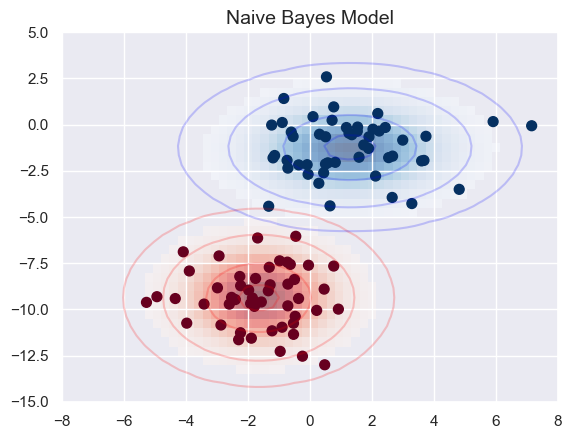

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

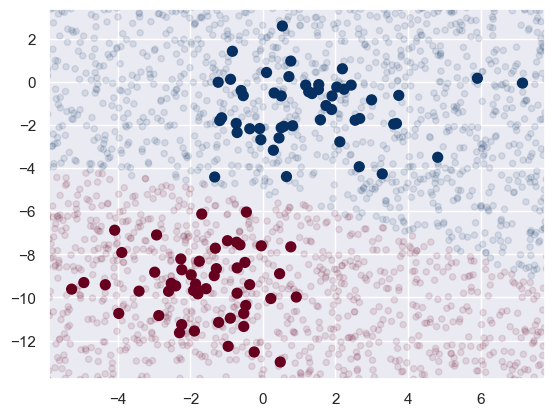

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

From: pbenson@ecst.csuchico.edu (Paul A. Benson)
Subject: CD-ROM Indexes available
Organization: California State University, Chico
Lines: 6
NNTP-Posting-Host: cscihp.ecst.csuchico.edu

The file and contents listings for:

Knowledge Media Resource Library: Graphics 1
Knowledge Media Resource Library: Audio 1

are now available for anonymous FTP from cdrom.com



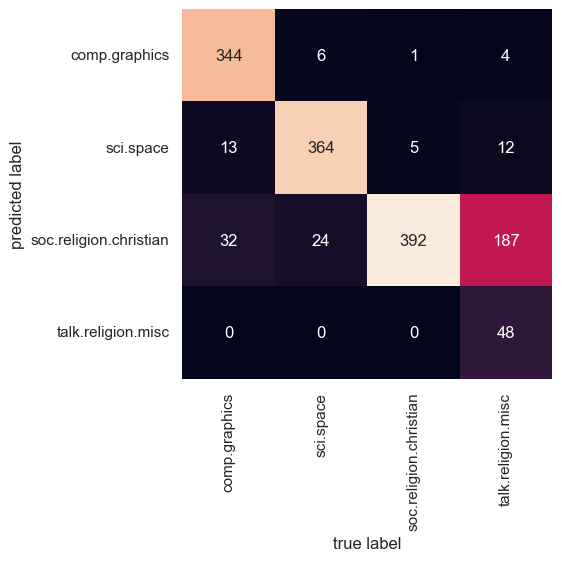

In [22]:
#Multinomial Naive Bayes
#Text Class

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[1000])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
#Predictiing which text is from which category :

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('Media')
predict_category('discussing islam vs atheism')

'soc.religion.christian'

#When to Use Naive Bayes

1.They are extremely fast for both training and prediction
2.They provide straightforward probabilistic prediction
3.They are often very easily interpretable
4.They have very few (if any) tunable parameters


NB will perform good under these conditions:

1.When the naive assumptions actually match the data (very rare in practice)
2.For very well-separated categories, when model complexity is less important
3.For very high-dimensional data, when model complexity is less important

Applications of Naïve Bayes Classifier:
1.It is used for Credit Scoring.
2.It is used in medical data classification.
3.It can be used in real-time predictions because Naïve Bayes Classifier is an eager learner.
4.It is used in Text classification such as Spam filtering and Sentiment analysis.

Support Vector Machines	 -> Both Classification  & Regression prblm 
    Motivating Support Vector Machines
	Support Vector Machines
	Maximizing the Margin

SVC(C=10000000000.0, kernel='linear')

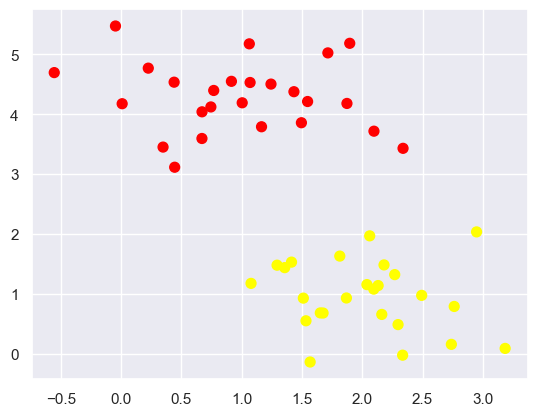

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; 
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)



In [32]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

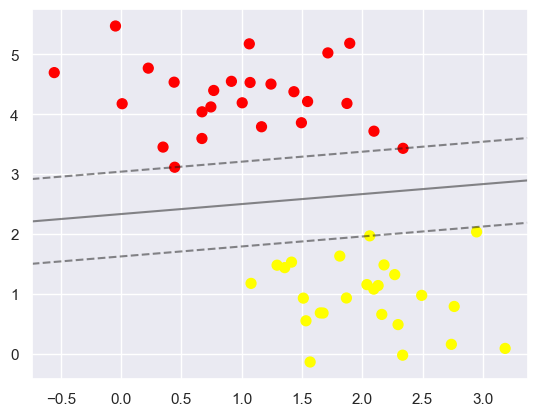

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

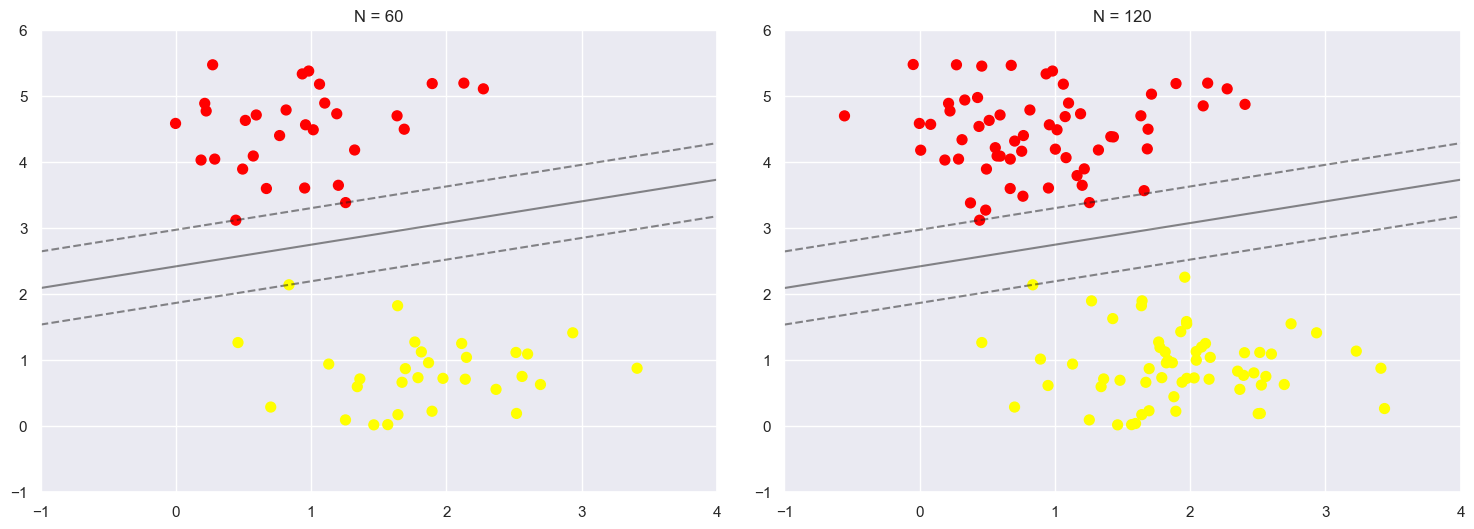

In [34]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Linear Regression	
    Simple Linear Regression
	Basis Function Regression
	Regularization

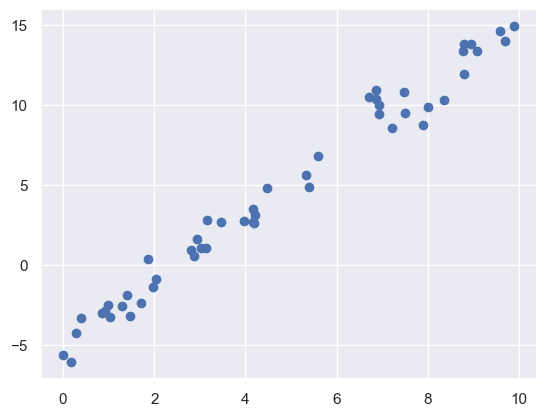

In [4]:
#y=ax+b
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);


-4.9985770855532
[2.02720881]


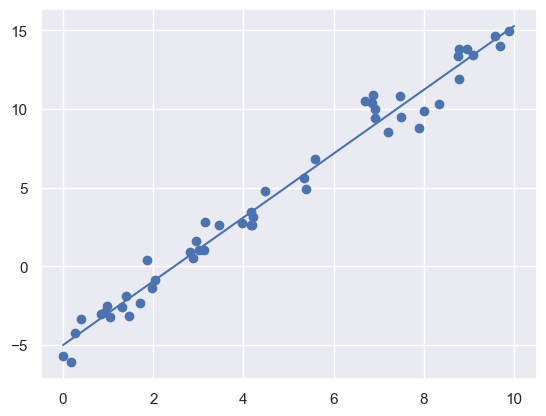

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print(model.intercept_)
print(model.coef_)

In [5]:
#Basis Function Regression
#y=a0+a1x1+a2x2+a3x3+⋯

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

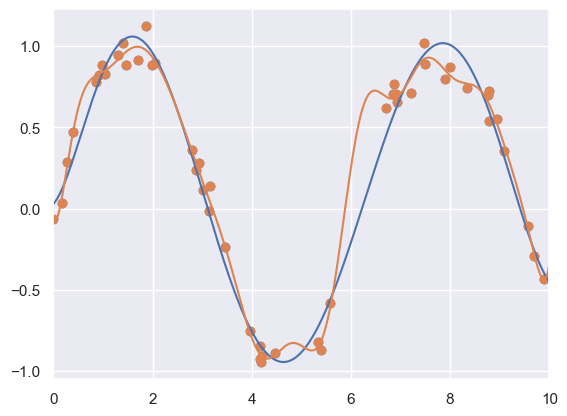

In [11]:
#Regularization
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

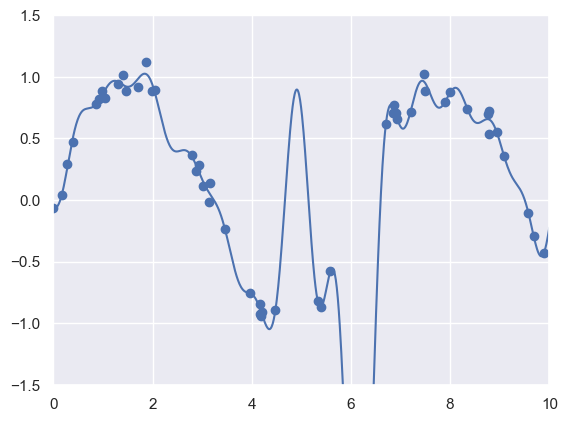

In [12]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

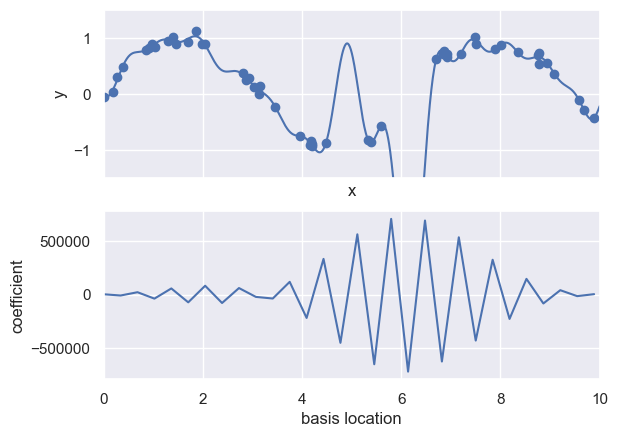

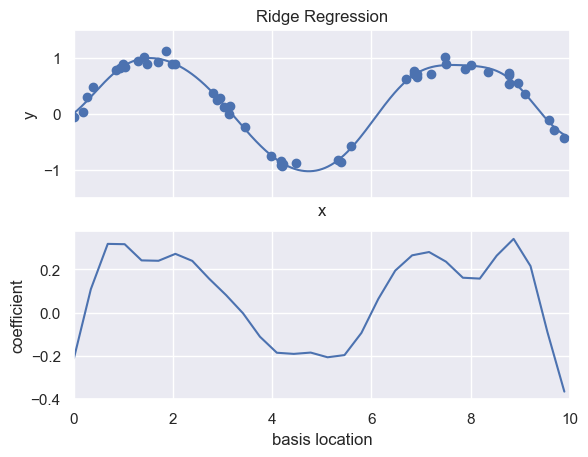

In [14]:
#ridge &lasso 
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

C:\Users\bjawa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


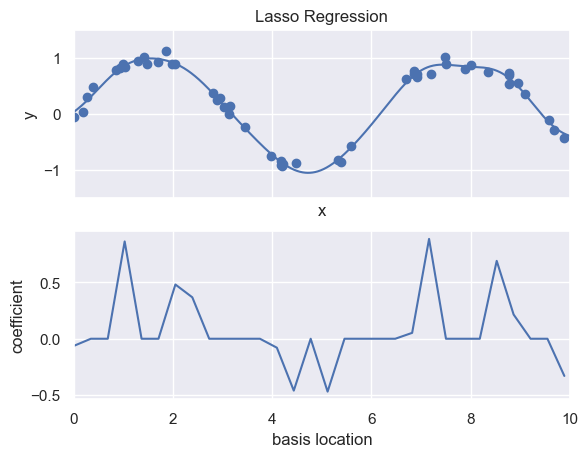

In [15]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')